In [270]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [271]:
df = pd.read_csv('Orders.csv', index_col=0)

In [272]:
df['Sales'] = df['Sales'].str.replace(',', '')
df['Sales']= df['Sales'].str.replace('$', '')
df['Sales']=pd.to_numeric(df['Sales'])

In [273]:
df['Profit'] = df['Profit'].str.replace(',', '')
df['Profit']= df['Profit'].str.replace('$', '')
df['Profit']=pd.to_numeric(df['Profit'])

In [274]:
df.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [275]:
df['Order.Date']=pd.to_datetime(df['Order.Date'],yearfirst=True)

In [276]:
df['Ship.Date']=pd.to_datetime(df['Ship.Date'],yearfirst=True)

In [277]:
df['s.year']=df['Ship.Date'].dt.year
df['s.month']=df['Ship.Date'].dt.month
df['s.day']=df['Ship.Date'].dt.day

In [278]:
df['o.year']=df['Order.Date'].dt.year
df['o.month']=df['Order.Date'].dt.month
df['o.day']=df['Order.Date'].dt.day

In [279]:
df.dtypes

Order.ID                  object
Order.Date        datetime64[ns]
Ship.Date         datetime64[ns]
Ship.Mode                 object
Customer.ID               object
Customer.Name             object
Segment                   object
Postal.Code              float64
City                      object
State                     object
Country                   object
Region                    object
Market                    object
Product.ID                object
Category                  object
Sub.Category              object
Product.Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping.Cost            float64
Order.Priority            object
s.year                     int64
s.month                    int64
s.day                      int64
o.year                     int64
o.month                    int64
o.day                      int64
dtype: object

In [280]:
df['Ship.Date'].index

Int64Index([40098, 26341, 25330, 13524, 47221, 22732, 30570, 31192, 40099,
            36258,
            ...
            35112,  6039, 24175, 24105,  9922, 29002, 34337, 31315,  9596,
             6147],
           dtype='int64', name='Row.ID', length=51290)

In [281]:
odf=df.groupby('o.month')['Quantity'].agg(['mean','count'])
odf.reset_index(inplace = True)
odf

,o.month,mean,count
0,1,3.455130,3109
1,2,3.366904,2949
2,3,3.520901,3684
3,4,3.480288,3475
4,5,3.515228,3973
5,6,3.399919,4911
6,7,3.458391,3593
7,8,3.473171,4715
8,9,3.433444,5131
9,10,3.563790,4507


In [282]:
sdf=df.groupby('s.month')['Quantity'].agg(['mean','count'])
sdf.reset_index(inplace = True) 
sdf

,s.month,mean,count
0,1,3.495441,3290
1,2,3.398233,3056
2,3,3.494042,3441
3,4,3.457700,3487
4,5,3.513918,3880
5,6,3.403212,4794
6,7,3.528542,3854
7,8,3.447177,4676
8,9,3.429300,5297
9,10,3.550782,4283


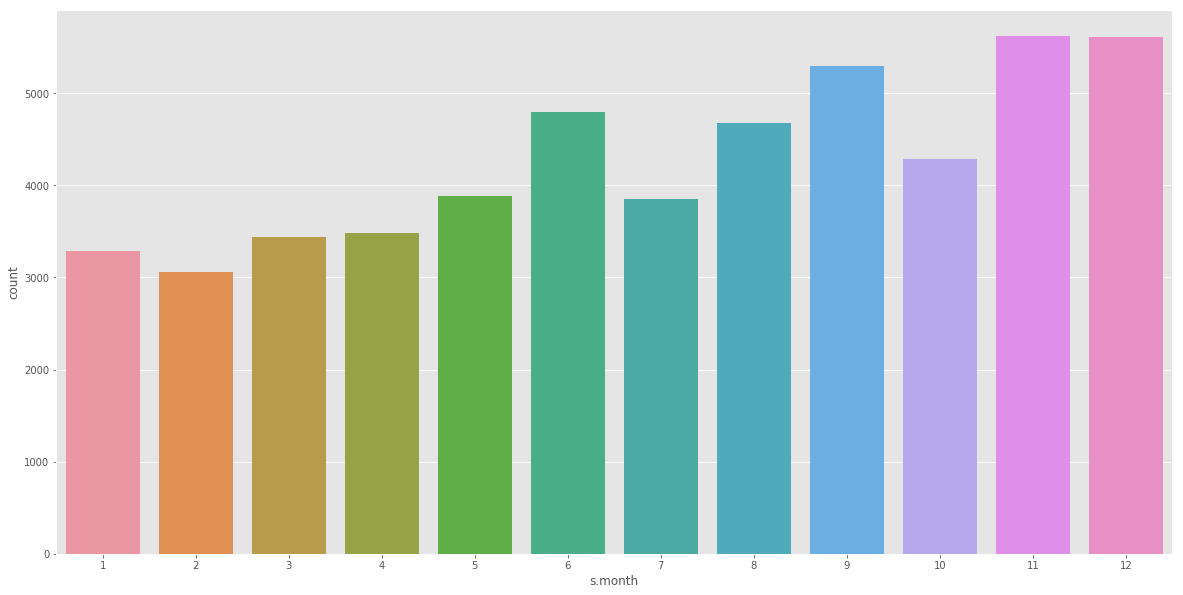

In [283]:
plt.figure(figsize = (20, 10))
sns.barplot(x="s.month", y="count", data=sdf)

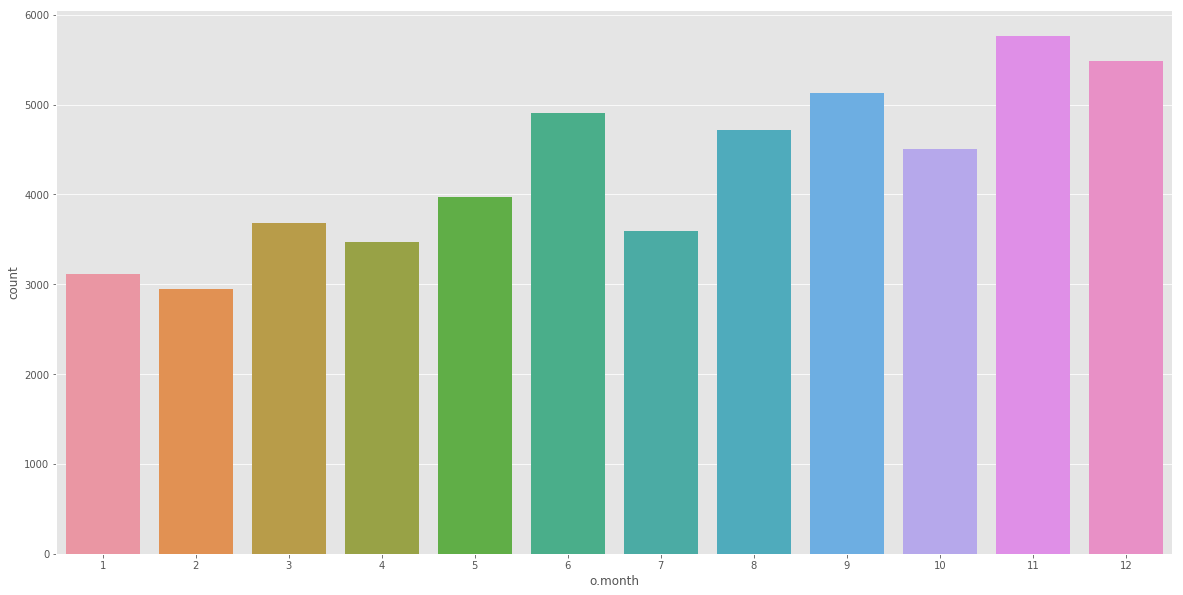

In [284]:
plt.figure(figsize = (20, 10))
sns.barplot(x="o.month", y="count", data=odf)

In [285]:
codf=df.groupby(['o.month','Category'])['Quantity'].agg(['mean','count'])
codf

mean  count
o.month Category                        
1       Furniture        3.511945    586
        Office Supplies  3.473795   1908
        Technology       3.343089    615
2       Furniture        3.574506    557
        Office Supplies  3.327664   1764
        Technology       3.292994    628
3       Furniture        3.634921    693
        Office Supplies  3.531071   2269
        Technology       3.379501    722
4       Furniture        3.485465    688
        Office Supplies  3.458532   2098
        Technology       3.541364    689
5       Furniture        3.463768    759
        Office Supplies  3.507481   2473
        Technology       3.593792    741
6       Furniture        3.481441    916
        Office Supplies  3.353311   3020
        Technology       3.467692    975
7       Furniture        3.574074    648
        Office Supplies  3.413201   2212
        Technology       3.492497    733
8       Furniture        3.539576    897
        Office Supplies  3.450311   2898
        Technology       3.480435    920
9       Furniture        3.498522   1015
        Office Supplies  3.422229   3131
        Technology       3.402030    985
10      Furniture        3.643519    864
        Office Supplies  3.518789   2741
        Technology       3.624169    902
11      Furniture        3.567663   1138
        Office Supplies  3.531430   3468
        Technology       3.488754   1156
12      Furniture        3.510464   1099
        Office Supplies  3.483822   3307
        Technology       3.453953   1075

In [286]:
codf.reset_index(inplace = True)

In [287]:
csdf=df.groupby(['s.month','Category'])['Quantity'].agg(['mean','count'])
csdf

mean  count
s.month Category                        
1       Furniture        3.587956    631
        Office Supplies  3.460930   2022
        Technology       3.513344    637
2       Furniture        3.448675    604
        Office Supplies  3.379650   1828
        Technology       3.403846    624
3       Furniture        3.590139    649
        Office Supplies  3.480715   2126
        Technology       3.442943    666
4       Furniture        3.591508    683
        Office Supplies  3.400288   2086
        Technology       3.497214    718
5       Furniture        3.497260    730
        Office Supplies  3.538398   2409
        Technology       3.450742    741
6       Furniture        3.530269    892
        Office Supplies  3.356801   2926
        Technology       3.426230    976
7       Furniture        3.637363    728
        Office Supplies  3.498309   2366
        Technology       3.518421    760
8       Furniture        3.458769    861
        Office Supplies  3.439848   2901
        Technology       3.459519    914
9       Furniture        3.455166   1026
        Office Supplies  3.421069   3237
        Technology       3.429400   1034
10      Furniture        3.618654    847
        Office Supplies  3.491512   2592
        Technology       3.664692    844
11      Furniture        3.525439   1081
        Office Supplies  3.532789   3431
        Technology       3.479242   1108
12      Furniture        3.557624   1128
        Office Supplies  3.485290   3365
        Technology       3.377122   1119

In [288]:
csdf.reset_index(inplace = True)

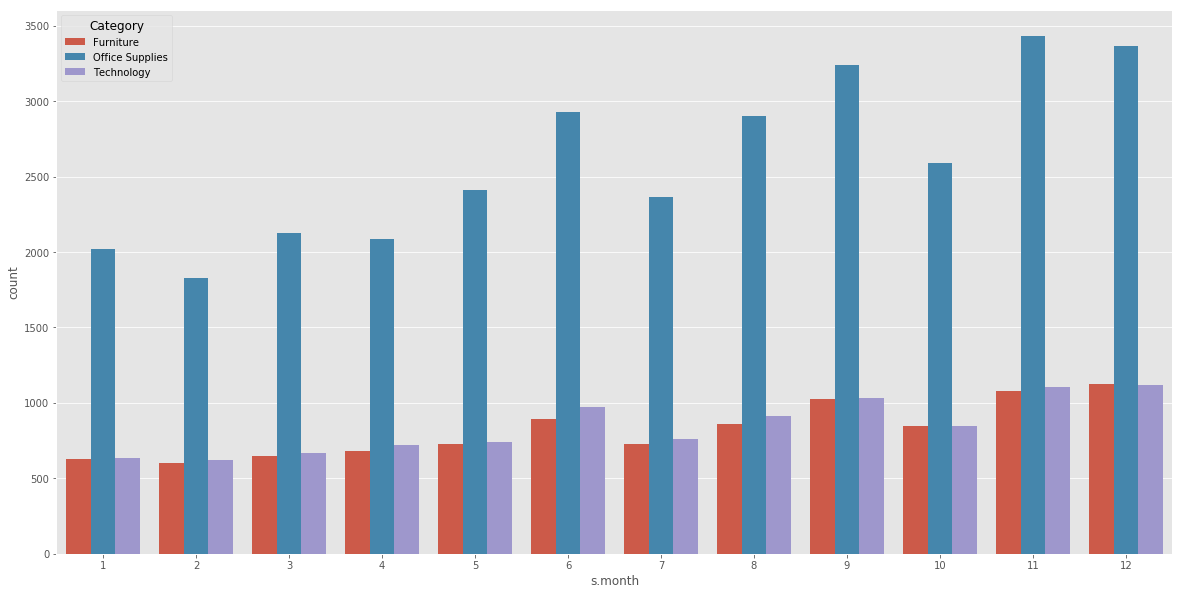

In [289]:
plt.figure(figsize = (20, 10))
sns.barplot(x="s.month", y="count", hue='Category',data=csdf)

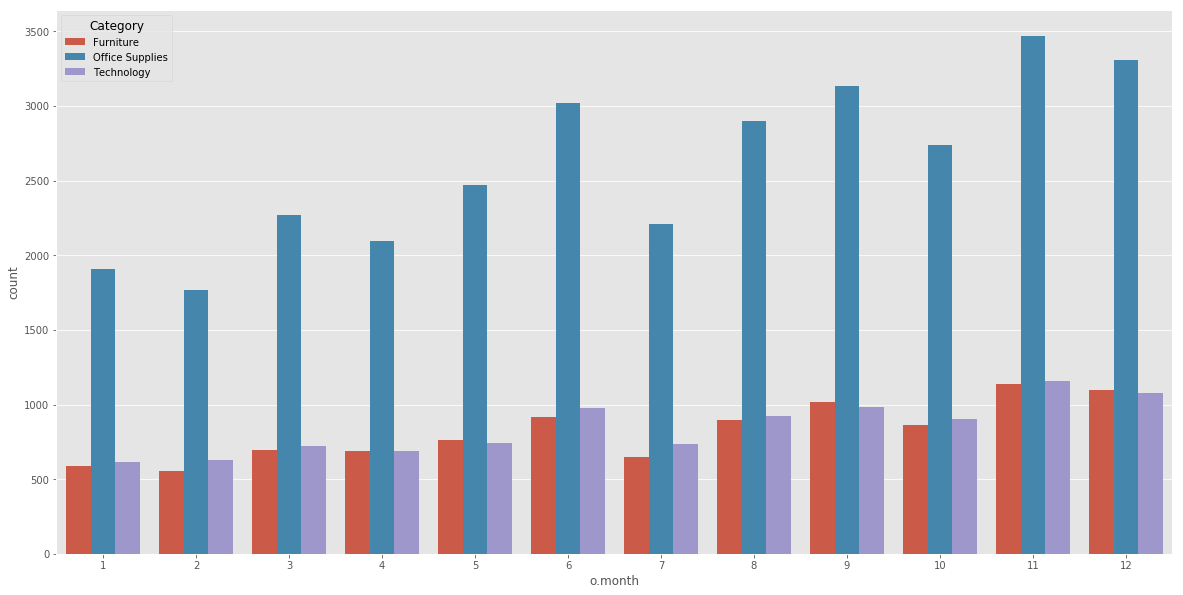

In [290]:
plt.figure(figsize = (20, 10))
sns.barplot(x="o.month", y="count", hue='Category',data=codf)

In [291]:
df

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Discount,Profit,Shipping.Cost,Order.Priority,s.year,s.month,s.day,o.year,o.month,o.day
Row.ID,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,2011-11-14,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,0.00,62.15,40.770,High,2014,11,13,2011,11,14
26341,IN-2014-JR162107-41675,2002-05-14,2002-07-14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,0.10,-288.77,923.630,Critical,2002,7,14,2002,5,14
25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,0.10,919.97,915.490,Medium,2014,10,18,2014,10,17
13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,0.10,-96.54,910.160,Medium,2014,1,30,2014,1,28
47221,SG-2014-RH9495111-41948,2011-05-14,2011-06-14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,0.00,311.52,903.040,Critical,2011,6,14,2011,5,14
22732,IN-2014-JM156557-41818,2014-06-28,2007-01-14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,New South Wales,...,0.10,763.28,897.350,Critical,2007,1,14,2014,6,28
30570,IN-2012-TS2134092-41219,2011-06-12,2011-08-12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,Wellington,...,0.00,564.84,894.770,Critical,2011,8,12,2011,6,12
31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,Waikato,...,0.00,996.48,878.380,High,2013,4,18,2013,4,14
40099,CA-2014-AB10015140-41954,2011-11-14,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,0.00,54.71,25.270,High,2014,11,13,2011,11,14


In [294]:
df.columns

Index(['Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode', 'Customer.ID',
       'Customer.Name', 'Segment', 'Postal.Code', 'City', 'State', 'Country',
       'Region', 'Market', 'Product.ID', 'Category', 'Sub.Category',
       'Product.Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping.Cost', 'Order.Priority', 's.year', 's.month', 's.day',
       'o.year', 'o.month', 'o.day'],
      dtype='object')